In [1]:
import sncosmo
import numpy as np
import matplotlib.pyplot as plt

In [5]:
snia_model = sncosmo.Model(source='salt2-extended')
snia_model.set(x1=0, c=0, x0= 1, t0=0)

In [6]:
snia_model.bandmag('sdssg', 'ab', 0)

10.554654717713571

In [3]:
snia_model.minwave(), snia_model.maxwave()

(1700.0, 24990.0)

In [4]:
full_wave = np.linspace(1700, 24990, 3000)
flux = snia_model.flux(wave = full_wave, time=0)

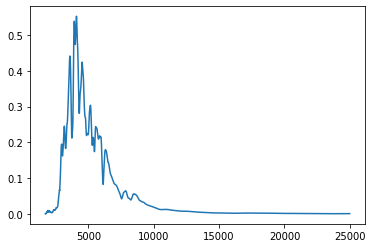

In [5]:
plt.plot(full_wave, flux)

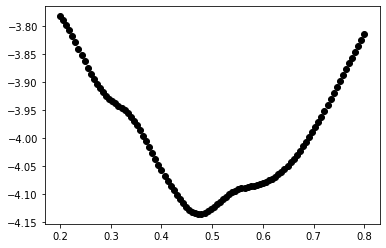

In [21]:
bmag = snia_model.bandmag('bessellb', 'ab', 0)

for z in np.linspace(0.2, 0.8, 100):
    snia_model.set(z = z)
    mag = snia_model.bandmag('bessellr', 'ab', 0)
    k_corr =  mag - bmag
    
    plt.scatter(z, k_corr, marker = 'o', c = 'k')

In [6]:
import sys
sys.path.append('../scripts')
import tde_utils

In [92]:
snia_scale = 1.128e-16 #/17588934.77
snia_source = tde_utils.BlackBodySource(temperature=5500., scale= 1.718e-16)
extended_model = sncosmo.Model(source=snia_source)
extended_model.set(z=0)

In [87]:
snia_scale * 1.5232561560002698

1.7182329439683044e-16

In [88]:
extended_model.minwave(), extended_model.maxwave()

(1.0, 150000.0)

In [89]:
full_wave[np.argmax(extended_model.flux(wave = full_wave, time=0))]

5792.640880293431

In [90]:
extended_wave = np.linspace(1700, 100000, 2000)

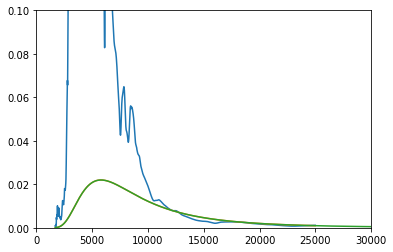

In [91]:
plt.plot(full_wave, flux)
plt.plot(full_wave, extended_model.flux(wave = full_wave, time=0))
plt.plot(extended_wave, extended_model.flux(wave = extended_wave, time=0))
plt.xlim(0, 30000)
plt.ylim(0, 0.1)
plt.show()

In [83]:
full_wave[np.argmax(flux)]

4084.1380460153387

In [84]:
np.max(flux) / np.max(extended_model.flux(wave = full_wave, time=0))

15.603788097756063

In [85]:
flux[-1] /extended_model.flux(wave = full_wave, time=0)[-1]

1.0001355902027382

In [84]:
full_wave[np.argmax(flux)]

4084.1380460153387

In [25]:
from astropy import constants as const
import astropy.units as u

In [33]:
def blackbody(wavelength, T = 7500):
    T = T * u.K
    wavelength = wavelength * u.Angstrom
    
    term1 = 2* const.h * (const.c**2) / (wavelength**5)
    term2 = 1 / (np.exp(const.h * const.c / (wavelength * const.k_B * T)) - 1)
    return (term1 * term2).to((u.erg) * (u.s**-1) * (u.cm**-2) * (u.Angstrom**-1))

In [37]:
test_source = tde_utils.BlackBodySource(temperature=7500, scale=1)
test_model = sncosmo.Model(source=test_source)

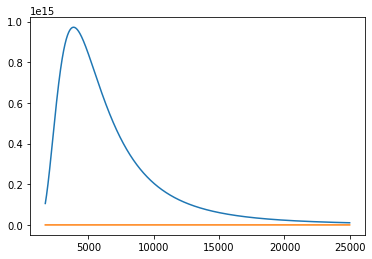

In [38]:
plt.plot(full_wave, blackbody(full_wave))
plt.plot(full_wave, 144.90744350236645*test_model.flux(wave=full_wave, time=0))

95758994.06235476 erg / (Angstrom cm2 s)
17588934.77552813 erg / (Angstrom cm2 s)


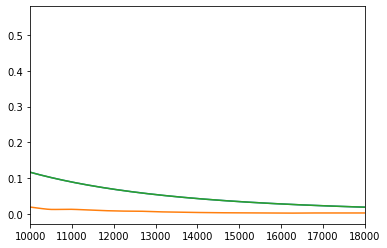

In [112]:
blackbody_spectrum = blackbody(full_wave)
norm = blackbody_spectrum[-10] / flux[-10]
print(norm)
norm = np.max(blackbody_spectrum) / np.max(flux)
print(norm)
plt.plot(full_wave, blackbody_spectrum / norm)
plt.plot(full_wave, flux)

extended_wave = np.linspace(1700, 190000, 5000)
plt.plot(extended_wave, blackbody(extended_wave) / norm)
plt.xlim(10000, 18000)
#plt.xlim(8000, 180000)
#plt.ylim(-0.001, 0.03)
plt.show()

In [95]:
#190 000

In [114]:
class Salt2Bonus(sncosmo.Model(source='salt2-extended')):
    
    def flux(self, time, wave):
        try:
            return super().flux(self, time, wave)
        except:
            return super().flux(self.time. self.maxwave())

Exception: 'salt2bonus' not in registry. Registered names: 'snemo7', 'snana-2006ix', 'v19-2013ab', 'nugent-sn1a', 'nugent-sn91bg', 'salt3-nir', 'v19-2008bj-corr', 'v19-2011ei', 'v19-2004fe-corr', 'v19-2009bw', 'v19-2012aw-corr', 'v19-1994i-corr', 'v19-2009jf', 'v19-2013by-corr', 's11-2006jl', 'v19-2008fq-corr', 'v19-iptf13bvn-corr', 'salt2-extended', 'snana-2006ns', 'snana-2007nw', 'v19-2016gkg', 'mlcs2k2', 'snana-2006jl', 'v19-2011hs-corr', 'v19-2012au-corr', 'v19-2006ep-corr', 'v19-2014g', 'v19-2004gv-corr', 'v19-2004et-corr', 'v19-2011fu-corr', 'v19-2013df', 'snana-2007lx', 'v19-2006t', 'v19-2011ht-corr', 'v19-2016x', 'v19-asassn14jb', 'v19-2013am-corr', 'snana-2006lc', 'v19-1994i', 'v19-2005bf', 'snana-2007ny', 'nugent-sn2p', 'v19-asassn15oz', 'v19-1998bw-corr', 'v19-1999dn-corr', 'whalen-z15d', 'snana-04d4jv', 'whalen-z25d', 'v19-2004gq-corr', 'v19-2007ru-corr', 'v19-2009ib', 'snana-2007nc', 'snana-2007pg', 'nugent-sn1bc', 'snana-2007nv', 'nugent-sn2n', 'v19-2008ax', 'snana-2007y', 'v19-1998bw', 'v19-2012a-corr', 'snana-2004hx', 'v19-2004gv', 'v19-2010al-corr', 'v19-2012ap', 'v19-2013ge', 'snana-sdss014475', 'snana-2006iw', 'v19-2004gt', 's11-2005hl', 'v19-asassn14jb-corr', 'v19-2007y-corr', 'snana-2007md', 'v19-2007uy', 'v19-2009bw-corr', 'v19-2008in-corr', 'snana-2006kv', 'v19-2006aj-corr', 'snana-2006kn', 'salt2-h17', 'v19-2006t-corr', 'v19-2006ep', 'v19-2007gr-corr', 'snana-2006jo', 'v19-2013ab-corr', 'v19-2013fs', 'nugent-hyper', 'v19-iptf13bvn', 'snana-2004ib', 'v19-2007pk', 'snana-2007ll', 'v19-2009dd', 's11-2005hm', 'snemo15', 'v19-1999em-corr', 'v19-2011fu', 'snana-2007lz', 'v19-2010al', 'snana-2005gi', 'v19-2007od-corr', 'salt2', 'snana-2007iz', 'v19-2014g-corr', 'salt2-extended-h17', 'v19-2011dh-corr', 'v19-2008ax-corr', 'snana-2005hm', 'v19-2009ip-corr', 'v19-1987a', 'v19-2013ge-corr', 'snana-2004fe', 'snana-2006ez', 'v19-2004aw', 'v19-2012a', 'snana-04d1la', 'nugent-sn91t', 'v19-2016bkv-corr', 'whalen-z15g', 's11-2006jo', 'v19-2011dh', 'v19-2009kr-corr', 'snana-sdss004012', 'v19-2005hg', 'v19-2008d-corr', 'v19-2004et', 'v19-2002ap-corr', 'v19-2011hs', 'v19-2016bkv', 's11-2005lc', 'v19-2004gq', 'v19-2008fq', 'v19-2013am', 'nugent-sn2l', 'v19-2013df-corr', 'v19-2008aq', 'v19-2013fs-corr', 'v19-2005hg-corr', 'hsiao-subsampled', 'snana-2004gv', 'snana-2006gq', 'v19-2009ip', 'v19-1999em', 'v19-2005bf-corr', 'hsiao', 'whalen-z25g', 'v19-2006aa-corr', 'v19-2009iz-corr', 'snana-2007ms', 'v19-2008bj', 'v19-2011ht', 'v19-2013ej', 'snana-2007kw', 'whalen-z15b', 'v19-2007y', 'v19-1993j-corr', 'snana-2007nr', 'v19-2007pk-corr', 'sugar', 'v19-2009iz', 'snemo2', 'snana-2007lb', 'v19-2011ei-corr', 'v19-2016x-corr', 's11-2005gi', 'v19-2009kr', 'v19-1987a-corr', 'v19-asassn15oz-corr', 'v19-1999dn', 'snana-2007ld', 'v19-2009bb-corr', 'snana-2007lj', 's11-2004hx', 'v19-2002ap', 'v19-2004fe', 'v19-2006aa', 'snana-2007ky', 's11-2006fo', 'v19-2008aq-corr', 'whalen-z40b', 'snana-2006ep', 'v19-2009n', 'v19-1993j', 'v19-2004gt-corr', 'v19-2007od', 'v19-2009n-corr', 'whalen-z25b', 'v19-2009bb', 'v19-2012aw', 'snf-2011fe', 'v19-2007ru', 'snana-2006fo', 'v19-2013ej-corr', 'v19-2016gkg-corr', 'v19-2011bm-corr', 'v19-2011bm', 'v19-2008d', 'v19-2004aw-corr', 'v19-2007uy-corr', 'v19-2007gr', 'v19-2008bo', 'whalen-z40g', 'v19-2013by', 'snana-2007og', 'v19-2006aj', 'v19-2008bo-corr', 'v19-2008in', 'v19-2009ib-corr', 'v19-2009jf-corr', 'snana-2004gq', 'v19-2012au', 'salt3', 'v19-2009dd-corr', 'v19-2012ap-corr'